# Compare results for different dialects

In [ ]:
from pathlib import Path
from notebook_utils import load_files_to_df, expand_abbreviations, make_heatmap
import pandas as pd
import matplotlib.pyplot as plt


pd.options.mode.copy_on_write = True

In [ ]:
output_dir = Path("../data/output/2024")

df = load_files_to_df(output_dir)

df = expand_abbreviations(df)

In [ ]:
columns_to_keep = [
    "cer",
    "wer",
    "sbert_semdist",
    "semdist",
    "aligned_semdist",
    "date",
    "model_name",
    "language_code",
    "prediction_langcode",
    "year",
    "dialect",
    "gender",
    "standardized_text",
    "standardized_text_nn",
]

df = df[columns_to_keep]

In [ ]:
def count_words(string):
    if isinstance(string, str):
        return len(string.split(" "))
    else:
        return 1


def count_chars(string):
    if isinstance(string, str):
        return len(string)
    else:
        return 1


def add_error_count(df: pd.DataFrame, text_col: str) -> pd.DataFrame:
    """Tell feil per ord og per tegn slik at vi kan regne ut score som ikke er påvirka av setningslengde"""
    df.loc[:, "word_count"] = df.loc[:, text_col].apply(count_words)
    df.loc[:, "char_count"] = df.loc[:, text_col].apply(count_chars)
    df.loc[:, "word_errors"] = df["wer"] * df["word_count"]
    df.loc[:, "char_errors"] = df["cer"] * df["char_count"]
    return df


df_total = df.copy()

df_nn = df_total.query("prediction_langcode == 'nno'")
df_nn = add_error_count(df_nn, "standardized_text_nn")

df_nb = df_total.query("prediction_langcode == 'nob'")
df_nb = add_error_count(df_nb, "standardized_text")

In [ ]:
imagedir = Path("images")
imagedir.mkdir(exist_ok=True, parents=True)

## Bokmål

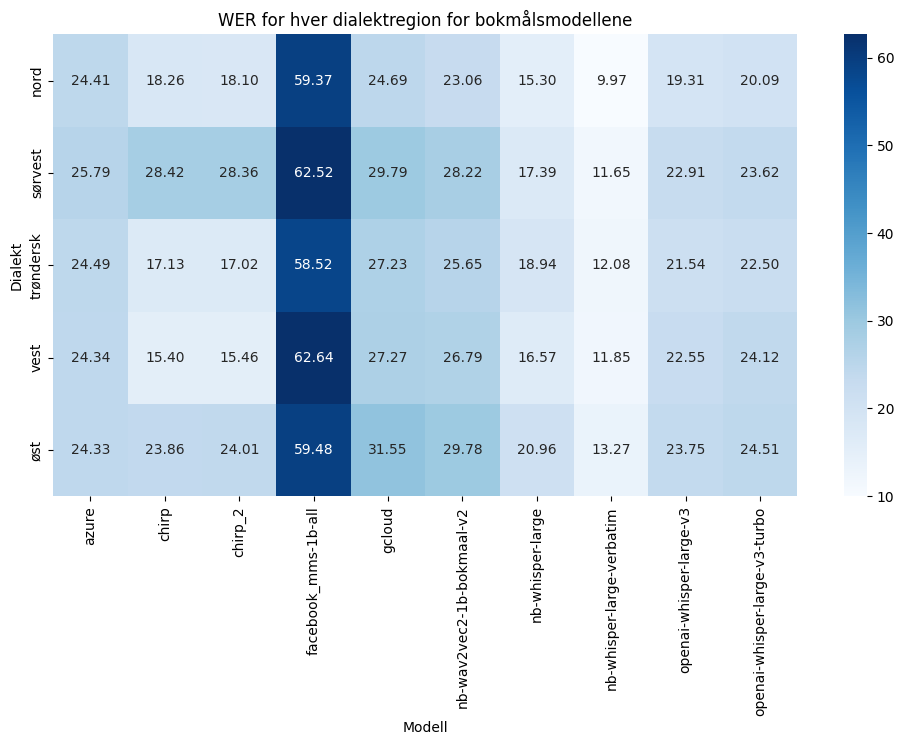

In [8]:
make_heatmap(df_nb, grouping="dialect", metric="wer", figsize=(12, 6))
plt.title("WER for hver dialektregion for bokmålsmodellene")
plt.savefig(imagedir / "dialect_wer_bokmål.png", dpi=300)

## Nynorsk

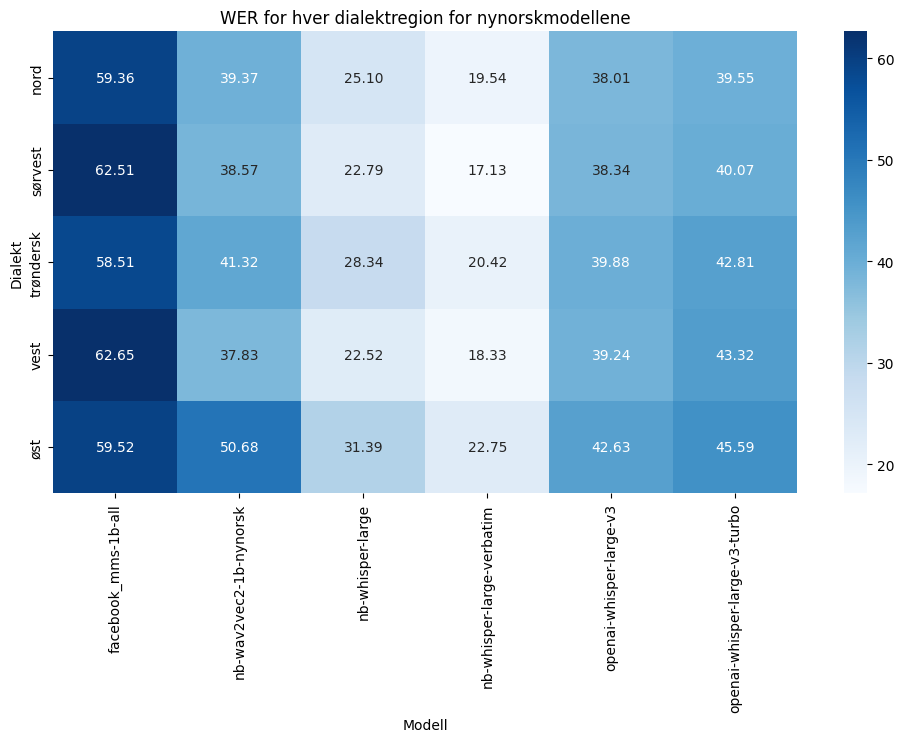

In [9]:
make_heatmap(df_nn, grouping="dialect", metric="wer", figsize=(12, 6))
plt.title("WER for hver dialektregion for nynorskmodellene")
plt.savefig(imagedir / "dialect_wer_nynorsk.png", dpi=300)